In [ ]:
!pip install numpy opencv-python matplotlib seaborn tensorflow scikit-learn

In [ ]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, y_train = x_train[:10000], y_train[:10000]  
x_test, y_test = x_test[:2000], y_test[:2000]        


In [ ]:

target_size = (32, 32)
x_train = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), target_size) for img in x_train])
x_test = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), target_size) for img in x_test])


In [ ]:

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


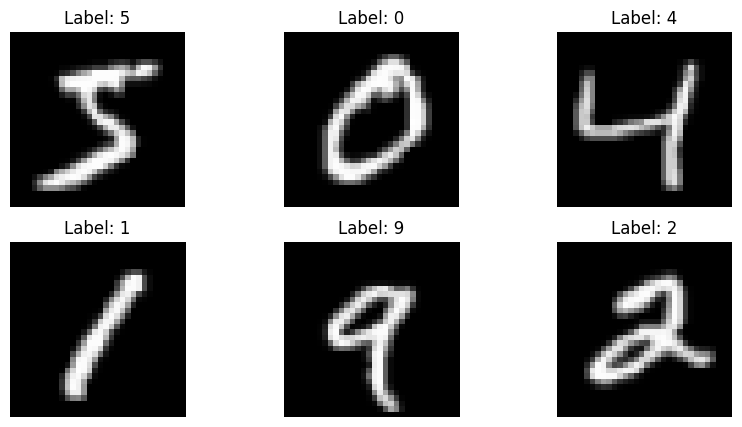

In [ ]:

def visualize_samples(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

visualize_samples(x_train[:6], y_train[:6])


In [ ]:

def create_model(base_model, num_classes=10, learning_rate=0.001):
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:

input_shape = (*target_size, 3)


base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_model_resnet.layers:
    layer.trainable = False  # Freeze ResNet50 layers
model_resnet = create_model(base_model_resnet)

base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_model_vgg16.layers:
    layer.trainable = False  # Freeze VGG16 layers
model_vgg16 = create_model(base_model_vgg16)


In [ ]:

print("Training ResNet50 model...")
history_resnet = model_resnet.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=32
)


Training ResNet50 model...
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.5222 - loss: 1.5230 - val_accuracy: 0.7530 - val_loss: 0.7579
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.8004 - loss: 0.6613 - val_accuracy: 0.8105 - val_loss: 0.5814
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.8466 - loss: 0.5049 - val_accuracy: 0.8335 - val_loss: 0.5009
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.8679 - loss: 0.4369 - val_accuracy: 0.8415 - val_loss: 0.4898
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.8788 - loss: 0.3904 - val_accuracy: 0.8670 - val_loss: 0.4151


In [ ]:

print("Training VGG16 model...")
history_vgg16 = model_vgg16.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=32
)


Training VGG16 model...
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.6249 - loss: 1.2360 - val_accuracy: 0.8695 - val_loss: 0.4746
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.8946 - loss: 0.3756 - val_accuracy: 0.9100 - val_loss: 0.3172
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.9198 - loss: 0.2667 - val_accuracy: 0.9185 - val_loss: 0.2694
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9383 - loss: 0.2114 - val_accuracy: 0.9265 - val_loss: 0.2389
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9453 - loss: 0.1850 - val_accuracy: 0.9315 - val_loss: 0.2185


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8688 - loss: 0.4020

ResNet50 Test Accuracy: 0.8670, Test Loss: 0.4151
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step


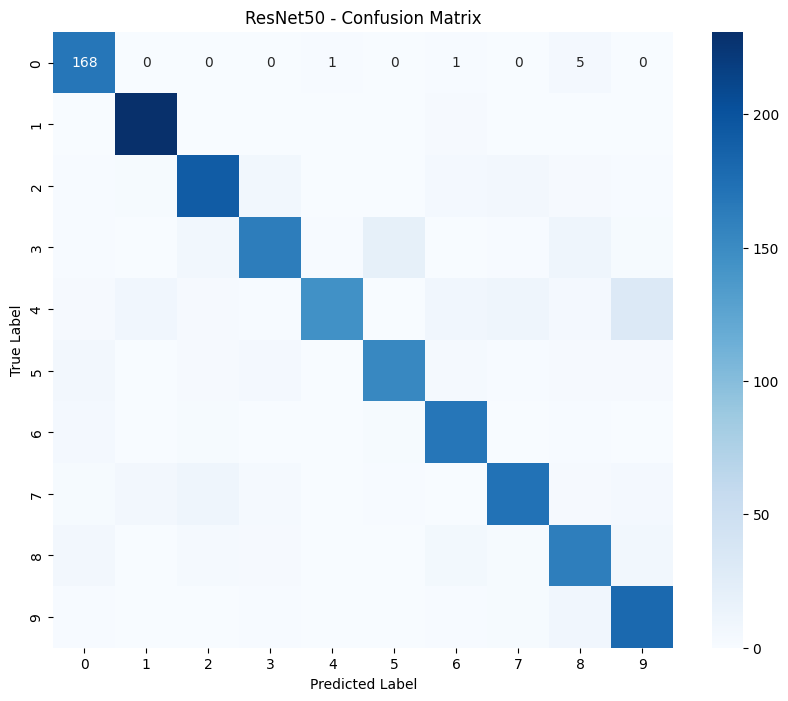

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9392 - loss: 0.2010

VGG16 Test Accuracy: 0.9315, Test Loss: 0.2185
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step


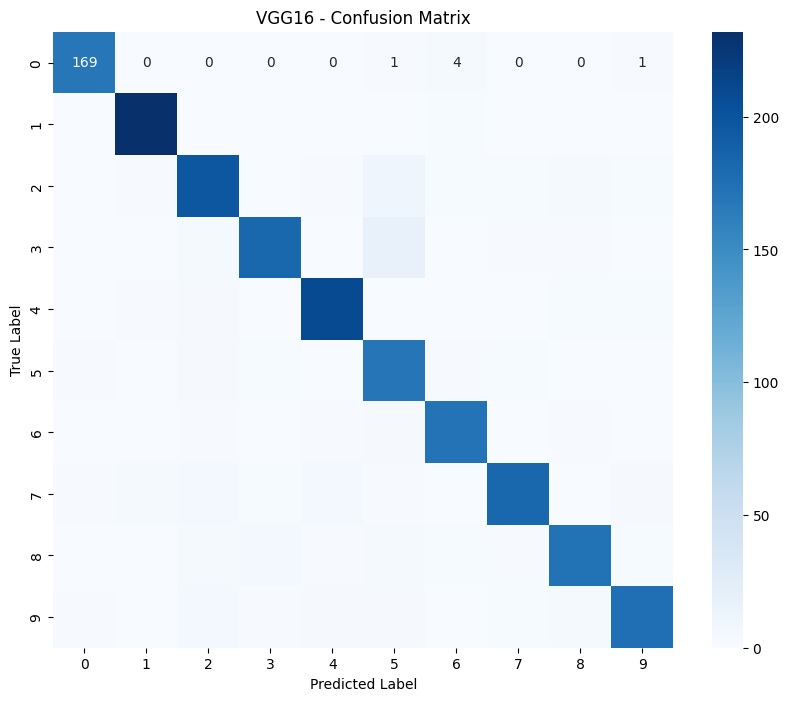

In [ ]:

def evaluate_model(model, x_test, y_test, name="Model"):
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"\n{name} Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")
    

    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    

    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

evaluate_model(model_resnet, x_test, y_test, "ResNet50")

evaluate_model(model_vgg16, x_test, y_test, "VGG16")


In [ ]:
model_resnet = create_model(base_model_resnet)
model_vgg16 = create_model(base_model_vgg16)

In [ ]:
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    start_time = time.time()
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32, verbose=1)
    training_time = time.time() - start_time

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    report = classification_report(y_true, y_pred, output_dict=True)

    return {
        'model_name': model_name,
        'test_accuracy': accuracy,
        'training_time': training_time,
        'classification_report': report
    }

results = []
results.append(train_and_evaluate_model(model_resnet, x_train, y_train, x_test, y_test, "ResNet50"))
results.append(train_and_evaluate_model(model_vgg16, x_train, y_train, x_test, y_test, "VGG16"))

for result in results:
    print(f"\n{result['model_name']}:")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print("\nClassification Report:")
    report = result['classification_report']
    print(f"Macro Avg F1-Score: {report['macro avg']['f1-score']:.4f}")
    print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")